In [1]:
import pandas as pd

data=pd.read_csv("df_calendar.csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,datetime,Load,sunrise_hour,sunset_hour,daylight_hours,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,2019-03-21 00:00:00+00:00,352.862799,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.000000,1.000000
1,2019-03-21 01:00:00+00:00,330.444853,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.258819,0.965926
2,2019-03-21 02:00:00+00:00,287.419792,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.500000,0.866025
3,2019-03-21 03:00:00+00:00,258.110368,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.707107,0.707107
4,2019-03-21 04:00:00+00:00,247.745866,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
22003,2021-09-22 19:00:00+00:00,632.235500,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819
22004,2021-09-22 20:00:00+00:00,612.703162,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000
22005,2021-09-22 21:00:00+00:00,589.574385,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107
22006,2021-09-22 22:00:00+00:00,561.323968,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.500000,0.866025


In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [3]:
df=data

In [4]:
df.dtypes

datetime           datetime64[ns, UTC]
Load                           float64
sunrise_hour                     int64
sunset_hour                      int64
daylight_hours                   int64
month_sin                      float64
month_cos                      float64
day_of_week_sin                float64
day_of_week_cos                float64
hour_sin                       float64
hour_cos                       float64
dtype: object

In [5]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [6]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df = df.asfreq('H')
X = df.drop(labels=[], axis=1)
y = df['Load']

In [7]:
y

datetime
2019-03-21 00:00:00+00:00    352.862799
2019-03-21 01:00:00+00:00    330.444853
2019-03-21 02:00:00+00:00    287.419792
2019-03-21 03:00:00+00:00    258.110368
2019-03-21 04:00:00+00:00    247.745866
                                ...    
2021-09-22 19:00:00+00:00    632.235500
2021-09-22 20:00:00+00:00    612.703162
2021-09-22 21:00:00+00:00    589.574385
2021-09-22 22:00:00+00:00    561.323968
2021-09-22 23:00:00+00:00    522.105758
Freq: H, Name: Load, Length: 22008, dtype: float64

In [8]:
X

,Load,sunrise_hour,sunset_hour,daylight_hours,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
datetime,,,,,,,,,,
2019-03-21 00:00:00+00:00,352.862799,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.000000,1.000000
2019-03-21 01:00:00+00:00,330.444853,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.258819,0.965926
2019-03-21 02:00:00+00:00,287.419792,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.500000,0.866025
2019-03-21 03:00:00+00:00,258.110368,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.707107,0.707107
2019-03-21 04:00:00+00:00,247.745866,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...
2021-09-22 19:00:00+00:00,632.235500,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819
2021-09-22 20:00:00+00:00,612.703162,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000
2021-09-22 21:00:00+00:00,589.574385,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107


In [9]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00+00:00', '2019-03-21 01:00:00+00:00',
               '2019-03-21 02:00:00+00:00', '2019-03-21 03:00:00+00:00',
               '2019-03-21 04:00:00+00:00', '2019-03-21 05:00:00+00:00',
               '2019-03-21 06:00:00+00:00', '2019-03-21 07:00:00+00:00',
               '2019-03-21 08:00:00+00:00', '2019-03-21 09:00:00+00:00',
               ...
               '2021-03-23 05:00:00+00:00', '2021-03-23 06:00:00+00:00',
               '2021-03-23 07:00:00+00:00', '2021-03-23 08:00:00+00:00',
               '2021-03-23 09:00:00+00:00', '2021-03-23 10:00:00+00:00',
               '2021-03-23 11:00:00+00:00', '2021-03-23 12:00:00+00:00',
               '2021-03-23 13:00:00+00:00', '2021-03-23 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=17607, freq='H')

In [11]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00+00:00', '2021-03-23 16:00:00+00:00',
               '2021-03-23 17:00:00+00:00', '2021-03-23 18:00:00+00:00',
               '2021-03-23 19:00:00+00:00', '2021-03-23 20:00:00+00:00',
               '2021-03-23 21:00:00+00:00', '2021-03-23 22:00:00+00:00',
               '2021-03-23 23:00:00+00:00', '2021-03-24 00:00:00+00:00',
               ...
               '2021-09-22 14:00:00+00:00', '2021-09-22 15:00:00+00:00',
               '2021-09-22 16:00:00+00:00', '2021-09-22 17:00:00+00:00',
               '2021-09-22 18:00:00+00:00', '2021-09-22 19:00:00+00:00',
               '2021-09-22 20:00:00+00:00', '2021-09-22 21:00:00+00:00',
               '2021-09-22 22:00:00+00:00', '2021-09-22 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=4401, freq='H')

<Axes: xlabel='datetime'>

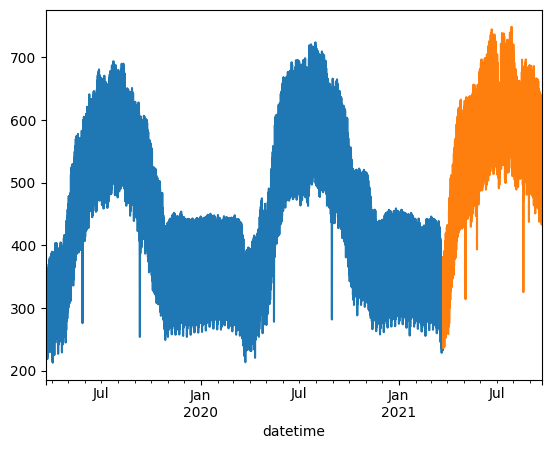

In [12]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('datetime').mean().plot()

In [13]:
print(X_train.shape, X_test.shape)

(17607, 10) (4401, 10)


In [14]:
y_train.shape

(17607,)

In [15]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load', 'sunrise_hour',
             'sunset_hour', 	'daylight_hours' ,	'month_sin' ,
             'month_cos' ,	'day_of_week_sin' 	,'day_of_week_cos',
             'hour_sin' ,	'hour_cos']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

In [16]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 10) (17583, 1) (4377, 24, 10) (4377, 1)


In [18]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.6 MB/s eta 0:00:00


In [19]:
import optuna

In [20]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [21]:

def build_model(num_layers, units, dropout_rates, learning_rate):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

In [22]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to be optimized
    num_layers = trial.suggest_int("num_layers", 1, 5 , 2)
    units = [trial.suggest_int(f"units_{i}", 50, 250) for i in range(num_layers)]
    dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Build the model based on the suggested hyperparameters
    model = build_model(num_layers, units, dropout_rates, learning_rate)



    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
       patience=3,
        restore_best_weights=True
    )



    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size = batch_size,
        validation_split=0.2,
        callbacks=[early_stopping]
        )

    # Return the validation loss as the objective value to minimize
    return np.min(history.history["val_loss"])


pruner = optuna.pruners.PercentilePruner(percentile=70)  # Adjust the percentile value as needed
#pruner = optuna.pruners.MedianPruner()
# Optimize the hyperparameters using Bayesian optimization
study = optuna.create_study( sampler=optuna.samplers.TPESampler(), direction="minimize" , pruner=pruner)
study.optimize(objective, n_trials=20)

# Get the best hyperparameters and the corresponding objective value
best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Objective Value:", best_value)

# Build the final model with the best hyperparameters
#best_model = build_model(best_params["num_layers"],
  #                       [best_params[f"units_{i}"] for i in range(best_params["num_layers"])],
          #               [best_params[f"dropout_{i}"] for i in range(best_params["num_layers"])])

[I 2024-04-09 04:38:22,228] A new study created in memory with name: no-name-299eddbb-ebed-4a5b-9f11-9b36573a1812
<ipython-input-22-4a7a22044f7e>:4: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_layers = trial.suggest_int("num_layers", 1, 5 , 2)
<ipython-input-22-4a7a22044f7e>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
<ipython-input-22-4a7a22044f7e>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


Epoch 1/50
440/440 [==============================] - 68s 138ms/step - loss: 0.0628 - val_loss: 0.0055
Epoch 2/50
440/440 [==============================] - 62s 142ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 3/50
440/440 [==============================] - 60s 135ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 4/50
440/440 [==============================] - 60s 136ms/step - loss: 0.0025 - val_loss: 7.9405e-04
Epoch 5/50
440/440 [==============================] - 60s 135ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 6/50
440/440 [==============================] - 60s 137ms/step - loss: 0.0017 - val_loss: 9.0199e-04
Epoch 7/50
440/440 [==============================] - 60s 136ms/step - loss: 0.0016 - val_loss: 5.1854e-04
Epoch 8/50
440/440 [==============================] - 60s 136ms/step - loss: 0.0013 - val_loss: 8.8150e-04
Epoch 9/50
440/440 [==============================] - 60s 136ms/step - loss: 0.0013 - val_loss: 7.3807e-04
Epoch 10/50
440/440 [==============================] 

[I 2024-04-09 04:48:34,485] Trial 0 finished with value: 0.0005185382906347513 and parameters: {'num_layers': 3, 'units_0': 137, 'units_1': 148, 'units_2': 167, 'dropout_0': 0.02688930036463877, 'dropout_1': 0.21530540432005535, 'dropout_2': 0.19345752765891167, 'learning_rate': 0.011777156875087104, 'batch_size': 32}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
110/110 [==============================] - 68s 531ms/step - loss: 0.4626 - val_loss: 0.0305
Epoch 2/50
110/110 [==============================] - 57s 522ms/step - loss: 0.0667 - val_loss: 0.0480
Epoch 3/50
110/110 [==============================] - 56s 512ms/step - loss: 0.0642 - val_loss: 0.0321
Epoch 4/50
110/110 [==============================] - 58s 530ms/step - loss: 0.0631 - val_loss: 0.0297
Epoch 5/50
110/110 [==============================] - 57s 520ms/step - loss: 0.0625 - val_loss: 0.0545
Epoch 6/50
110/110 [==============================] - 56s 511ms/step - loss: 0.0623 - val_loss: 0.0608
Epoch 7/50
110/110 [==============================] - 57s 521ms/step - loss: 0.0615 - val_loss: 0.0406


[I 2024-04-09 04:55:26,174] Trial 1 finished with value: 0.0297091044485569 and parameters: {'num_layers': 5, 'units_0': 216, 'units_1': 222, 'units_2': 75, 'units_3': 106, 'units_4': 132, 'dropout_0': 0.009364895259948325, 'dropout_1': 0.418795768849099, 'dropout_2': 0.18816863029690556, 'dropout_3': 0.050951492367424966, 'dropout_4': 0.23289962006397374, 'learning_rate': 0.038758911063650155, 'batch_size': 128}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
880/880 [==============================] - 82s 84ms/step - loss: 0.1990 - val_loss: 0.3987
Epoch 2/50
880/880 [==============================] - 73s 83ms/step - loss: 0.0884 - val_loss: 0.0236
Epoch 3/50
880/880 [==============================] - 72s 82ms/step - loss: 0.0919 - val_loss: 0.0585
Epoch 4/50
880/880 [==============================] - 74s 84ms/step - loss: 0.0911 - val_loss: 0.2873
Epoch 5/50
880/880 [==============================] - 74s 84ms/step - loss: 0.0887 - val_loss: 0.0121
Epoch 6/50
880/880 [==============================] - 73s 83ms/step - loss: 0.0953 - val_loss: 0.4117
Epoch 7/50
880/880 [==============================] - 74s 85ms/step - loss: 0.0888 - val_loss: 0.0146
Epoch 8/50
880/880 [==============================] - 73s 83ms/step - loss: 0.0940 - val_loss: 0.4547


[I 2024-04-09 05:06:02,261] Trial 2 finished with value: 0.012126602232456207 and parameters: {'num_layers': 3, 'units_0': 241, 'units_1': 77, 'units_2': 127, 'dropout_0': 0.25278938687939356, 'dropout_1': 0.05607251897112975, 'dropout_2': 0.11579058190175295, 'learning_rate': 0.06664194141640051, 'batch_size': 16}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
880/880 [==============================] - 85s 90ms/step - loss: 0.2547 - val_loss: 0.0285
Epoch 2/50
880/880 [==============================] - 79s 89ms/step - loss: 0.1007 - val_loss: 0.0305
Epoch 3/50
880/880 [==============================] - 79s 90ms/step - loss: 0.1099 - val_loss: 0.1684
Epoch 4/50
880/880 [==============================] - 77s 87ms/step - loss: 0.1217 - val_loss: 0.1640


[I 2024-04-09 05:11:56,043] Trial 3 finished with value: 0.028522470965981483 and parameters: {'num_layers': 3, 'units_0': 121, 'units_1': 214, 'units_2': 85, 'dropout_0': 0.09695062974110208, 'dropout_1': 0.4446255569659668, 'dropout_2': 0.4633020211414205, 'learning_rate': 0.09081606445315861, 'batch_size': 16}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
110/110 [==============================] - 59s 470ms/step - loss: 0.3898 - val_loss: 0.0042
Epoch 2/50
110/110 [==============================] - 49s 449ms/step - loss: 0.0112 - val_loss: 0.0037
Epoch 3/50
110/110 [==============================] - 48s 437ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 4/50
110/110 [==============================] - 48s 439ms/step - loss: 0.0078 - val_loss: 0.0029
Epoch 5/50
110/110 [==============================] - 49s 445ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 6/50
110/110 [==============================] - 50s 455ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 7/50
110/110 [==============================] - 49s 447ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 8/50
110/110 [==============================] - 49s 449ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 9/50
110/110 [==============================] - 49s 449ms/step - loss: 0.0038 - val_loss: 7.7809e-04
Epoch 10/50
110/110 [==============================] - 49s 445ms/step

[I 2024-04-09 05:28:37,894] Trial 4 finished with value: 0.0005483868299052119 and parameters: {'num_layers': 3, 'units_0': 187, 'units_1': 245, 'units_2': 165, 'dropout_0': 0.4330246290133108, 'dropout_1': 0.10015129425555197, 'dropout_2': 0.4565516593022486, 'learning_rate': 0.008310358608876182, 'batch_size': 128}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
220/220 [==============================] - 58s 237ms/step - loss: 0.0206 - val_loss: 0.0023
Epoch 2/50
220/220 [==============================] - 51s 231ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 3/50
220/220 [==============================] - 51s 231ms/step - loss: 0.0032 - val_loss: 9.3713e-04
Epoch 4/50
220/220 [==============================] - 52s 238ms/step - loss: 0.0026 - val_loss: 8.8666e-04
Epoch 5/50
220/220 [==============================] - 51s 233ms/step - loss: 0.0025 - val_loss: 7.3206e-04
Epoch 6/50
220/220 [==============================] - 51s 231ms/step - loss: 0.0022 - val_loss: 6.5306e-04
Epoch 7/50
220/220 [==============================] - 51s 230ms/step - loss: 0.0019 - val_loss: 5.3861e-04
Epoch 8/50
220/220 [==============================] - 50s 229ms/step - loss: 0.0018 - val_loss: 8.2564e-04
Epoch 9/50
220/220 [==============================] - 52s 235ms/step - loss: 0.0017 - val_loss: 6.1589e-04
Epoch 10/50
220/220 [========================

[I 2024-04-09 05:38:09,550] Trial 5 finished with value: 0.0005386135308071971 and parameters: {'num_layers': 3, 'units_0': 122, 'units_1': 243, 'units_2': 165, 'dropout_0': 0.3300269932022193, 'dropout_1': 0.06122651018959224, 'dropout_2': 0.2962819250804605, 'learning_rate': 0.002623631570386579, 'batch_size': 64}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
110/110 [==============================] - 43s 336ms/step - loss: 0.0151 - val_loss: 0.0031
Epoch 2/50
110/110 [==============================] - 38s 342ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 3/50
110/110 [==============================] - 38s 342ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/50
110/110 [==============================] - 37s 338ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 5/50
110/110 [==============================] - 36s 329ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 6/50
110/110 [==============================] - 36s 325ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 7/50
110/110 [==============================] - 36s 325ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 8/50
110/110 [==============================] - 36s 331ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/50
110/110 [==============================] - 37s 335ms/step - loss: 0.0021 - val_loss: 0.0014


[I 2024-04-09 05:44:36,418] Trial 6 finished with value: 0.001084216171875596 and parameters: {'num_layers': 3, 'units_0': 242, 'units_1': 95, 'units_2': 165, 'dropout_0': 0.10081647501765173, 'dropout_1': 0.07043968770098791, 'dropout_2': 0.1949893843243704, 'learning_rate': 0.0004653480371634498, 'batch_size': 128}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
220/220 [==============================] - 18s 74ms/step - loss: 0.0337 - val_loss: 0.0083
Epoch 2/50
220/220 [==============================] - 15s 70ms/step - loss: 0.0113 - val_loss: 0.0040
Epoch 3/50
220/220 [==============================] - 16s 71ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 4/50
220/220 [==============================] - 15s 68ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 5/50
220/220 [==============================] - 15s 68ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 6/50
220/220 [==============================] - 15s 68ms/step - loss: 0.0069 - val_loss: 0.0029
Epoch 7/50
220/220 [==============================] - 16s 75ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 8/50
220/220 [==============================] - 15s 68ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 9/50
220/220 [==============================] - 15s 68ms/step - loss: 0.0058 - val_loss: 0.0027
Epoch 10/50
220/220 [==============================] - 15s 68ms/step - loss: 0.005

[I 2024-04-09 05:56:09,127] Trial 7 finished with value: 0.0008158205891959369 and parameters: {'num_layers': 1, 'units_0': 202, 'dropout_0': 0.17454477325206214, 'learning_rate': 3.147546280622377e-05, 'batch_size': 64}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
880/880 [==============================] - 70s 74ms/step - loss: 0.0142 - val_loss: 0.0032
Epoch 2/50
880/880 [==============================] - 64s 72ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 3/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 4/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 5/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 6/50
880/880 [==============================] - 64s 73ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 7/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 8/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 9/50
880/880 [==============================] - 63s 71ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 10/50
880/880 [==============================] - 63s 72ms/step - loss: 0.002

[I 2024-04-09 06:25:36,530] Trial 8 finished with value: 0.0006219212664291263 and parameters: {'num_layers': 3, 'units_0': 115, 'units_1': 156, 'units_2': 106, 'dropout_0': 0.008195681960302292, 'dropout_1': 0.2778292395856342, 'dropout_2': 0.03223828616895502, 'learning_rate': 2.8033974631558765e-05, 'batch_size': 16}. Best is trial 0 with value: 0.0005185382906347513.


Epoch 1/50
220/220 [==============================] - 15s 59ms/step - loss: 0.2003 - val_loss: 0.0017
Epoch 2/50
220/220 [==============================] - 12s 57ms/step - loss: 0.0029 - val_loss: 9.7985e-04
Epoch 3/50
220/220 [==============================] - 13s 57ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/50
220/220 [==============================] - 13s 57ms/step - loss: 0.0014 - val_loss: 3.5855e-04
Epoch 5/50
220/220 [==============================] - 13s 57ms/step - loss: 0.0012 - val_loss: 4.0093e-04
Epoch 6/50
220/220 [==============================] - 13s 57ms/step - loss: 0.0011 - val_loss: 4.1499e-04
Epoch 7/50
220/220 [==============================] - 13s 58ms/step - loss: 0.0011 - val_loss: 3.2463e-04
Epoch 8/50
220/220 [==============================] - 13s 58ms/step - loss: 9.9651e-04 - val_loss: 3.3140e-04
Epoch 9/50
220/220 [==============================] - 14s 63ms/step - loss: 9.4382e-04 - val_loss: 4.5983e-04
Epoch 10/50
220/220 [=========================

[I 2024-04-09 06:31:01,643] Trial 9 finished with value: 0.00012625484669115394 and parameters: {'num_layers': 1, 'units_0': 177, 'dropout_0': 0.0711833153105021, 'learning_rate': 0.026730407359204247, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 7s 21ms/step - loss: 0.0513 - val_loss: 0.0049
Epoch 2/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0148 - val_loss: 0.0035
Epoch 3/50
220/220 [==============================] - 4s 19ms/step - loss: 0.0111 - val_loss: 0.0029
Epoch 4/50
220/220 [==============================] - 4s 19ms/step - loss: 0.0098 - val_loss: 0.0027
Epoch 5/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 6/50
220/220 [==============================] - 4s 19ms/step - loss: 0.0086 - val_loss: 0.0024
Epoch 7/50
220/220 [==============================] - 4s 19ms/step - loss: 0.0077 - val_loss: 0.0025
Epoch 8/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 9/50
220/220 [==============================] - 4s 19ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 10/50
220/220 [==============================] - 5s 21ms/step - loss: 0.0065 - val_lo

[I 2024-04-09 06:33:59,702] Trial 10 finished with value: 0.0006029267678968608 and parameters: {'num_layers': 1, 'units_0': 72, 'dropout_0': 0.49504415006919306, 'learning_rate': 0.00038953719160466813, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
440/440 [==============================] - 157s 336ms/step - loss: 0.1809 - val_loss: 0.0662
Epoch 2/50
440/440 [==============================] - 143s 324ms/step - loss: 0.0628 - val_loss: 0.0458
Epoch 3/50
440/440 [==============================] - 147s 334ms/step - loss: 0.0629 - val_loss: 0.0651
Epoch 4/50
440/440 [==============================] - 143s 324ms/step - loss: 0.0613 - val_loss: 0.0164
Epoch 5/50
440/440 [==============================] - 143s 325ms/step - loss: 0.0204 - val_loss: 0.0109
Epoch 6/50
440/440 [==============================] - 143s 325ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 7/50
440/440 [==============================] - 144s 327ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 8/50
440/440 [==============================] - 143s 325ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 9/50
440/440 [==============================] - 146s 332ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 10/50
440/440 [==============================] - 144s 328m

[I 2024-04-09 07:00:47,318] Trial 11 finished with value: 0.0011301698395982385 and parameters: {'num_layers': 5, 'units_0': 161, 'units_1': 146, 'units_2': 229, 'units_3': 239, 'units_4': 241, 'dropout_0': 0.11691327492136691, 'dropout_1': 0.22993674236839814, 'dropout_2': 0.3247173982203283, 'dropout_3': 0.4798476135364502, 'dropout_4': 0.004710200103188789, 'learning_rate': 0.009858992108650976, 'batch_size': 32}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
440/440 [==============================] - 20s 40ms/step - loss: 0.0298 - val_loss: 0.0012
Epoch 2/50
440/440 [==============================] - 18s 42ms/step - loss: 0.0023 - val_loss: 6.8499e-04
Epoch 3/50
440/440 [==============================] - 17s 39ms/step - loss: 0.0015 - val_loss: 9.8325e-04
Epoch 4/50
440/440 [==============================] - 18s 40ms/step - loss: 0.0012 - val_loss: 3.9250e-04
Epoch 5/50
440/440 [==============================] - 18s 41ms/step - loss: 9.5719e-04 - val_loss: 3.7501e-04
Epoch 6/50
440/440 [==============================] - 17s 39ms/step - loss: 8.6980e-04 - val_loss: 2.8328e-04
Epoch 7/50
440/440 [==============================] - 20s 45ms/step - loss: 6.9685e-04 - val_loss: 2.7716e-04
Epoch 8/50
440/440 [==============================] - 17s 39ms/step - loss: 6.5017e-04 - val_loss: 2.7876e-04
Epoch 9/50
440/440 [==============================] - 18s 42ms/step - loss: 5.6873e-04 - val_loss: 2.6471e-04
Epoch 10/50
440/440 [=========

[I 2024-04-09 07:05:35,511] Trial 12 finished with value: 0.00014689260569866747 and parameters: {'num_layers': 1, 'units_0': 163, 'dropout_0': 0.20356297510061228, 'learning_rate': 0.011930338370136096, 'batch_size': 32}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
440/440 [==============================] - 20s 42ms/step - loss: 0.0078 - val_loss: 0.0012
Epoch 2/50
440/440 [==============================] - 19s 43ms/step - loss: 0.0023 - val_loss: 9.0014e-04
Epoch 3/50
440/440 [==============================] - 18s 40ms/step - loss: 0.0017 - val_loss: 4.3333e-04
Epoch 4/50
440/440 [==============================] - 19s 43ms/step - loss: 0.0014 - val_loss: 7.1603e-04
Epoch 5/50
440/440 [==============================] - 18s 40ms/step - loss: 0.0012 - val_loss: 4.6063e-04
Epoch 6/50
440/440 [==============================] - 19s 43ms/step - loss: 0.0011 - val_loss: 4.5464e-04


[I 2024-04-09 07:07:27,992] Trial 13 finished with value: 0.0004333267279434949 and parameters: {'num_layers': 1, 'units_0': 170, 'dropout_0': 0.23016536795862733, 'learning_rate': 0.0019510962553424746, 'batch_size': 32}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
440/440 [==============================] - 10s 19ms/step - loss: 0.0274 - val_loss: 0.0012
Epoch 2/50
440/440 [==============================] - 7s 15ms/step - loss: 0.0027 - val_loss: 7.1338e-04
Epoch 3/50
440/440 [==============================] - 8s 17ms/step - loss: 0.0018 - val_loss: 6.0955e-04
Epoch 4/50
440/440 [==============================] - 7s 15ms/step - loss: 0.0015 - val_loss: 9.5995e-04
Epoch 5/50
440/440 [==============================] - 8s 17ms/step - loss: 0.0012 - val_loss: 4.7275e-04
Epoch 6/50
440/440 [==============================] - 7s 15ms/step - loss: 0.0011 - val_loss: 3.4602e-04
Epoch 7/50
440/440 [==============================] - 7s 17ms/step - loss: 0.0010 - val_loss: 5.8706e-04
Epoch 8/50
440/440 [==============================] - 8s 19ms/step - loss: 0.0010 - val_loss: 3.5564e-04
Epoch 9/50
440/440 [==============================] - 7s 15ms/step - loss: 9.2211e-04 - val_loss: 4.4173e-04


[I 2024-04-09 07:08:36,175] Trial 14 finished with value: 0.0003460161969996989 and parameters: {'num_layers': 1, 'units_0': 81, 'dropout_0': 0.28307918762294193, 'learning_rate': 0.018596997470596656, 'batch_size': 32}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 15s 58ms/step - loss: 0.0114 - val_loss: 0.0027
Epoch 2/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0025 - val_loss: 8.4468e-04
Epoch 3/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0018 - val_loss: 7.2790e-04
Epoch 4/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0014 - val_loss: 6.0861e-04
Epoch 5/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0012 - val_loss: 5.1472e-04
Epoch 6/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0012 - val_loss: 4.3941e-04
Epoch 7/50
220/220 [==============================] - 12s 56ms/step - loss: 0.0010 - val_loss: 4.1231e-04
Epoch 8/50
220/220 [==============================] - 12s 56ms/step - loss: 9.5024e-04 - val_loss: 3.3966e-04
Epoch 9/50
220/220 [==============================] - 12s 56ms/step - loss: 8.7502e-04 - val_loss: 6.7389e-04
Epoch 10/50
220/220 [=====================

[I 2024-04-09 07:13:53,048] Trial 15 finished with value: 0.00013234901416581124 and parameters: {'num_layers': 1, 'units_0': 178, 'dropout_0': 0.1870352891489004, 'learning_rate': 0.003274761035309765, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 15s 62ms/step - loss: 0.0202 - val_loss: 0.0036
Epoch 2/50
220/220 [==============================] - 13s 58ms/step - loss: 0.0067 - val_loss: 0.0027
Epoch 3/50
220/220 [==============================] - 13s 58ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 4/50
220/220 [==============================] - 13s 61ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 5/50
220/220 [==============================] - 14s 65ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 6/50
220/220 [==============================] - 13s 59ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 7/50
220/220 [==============================] - 13s 59ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/50
220/220 [==============================] - 13s 59ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 9/50
220/220 [==============================] - 13s 59ms/step - loss: 0.0022 - val_loss: 9.8877e-04
Epoch 10/50
220/220 [==============================] - 13s 59ms/step - loss: 0

[I 2024-04-09 07:20:40,927] Trial 16 finished with value: 0.0004098269564565271 and parameters: {'num_layers': 1, 'units_0': 188, 'dropout_0': 0.15502332216139073, 'learning_rate': 0.00017248490789184483, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 6s 17ms/step - loss: 0.0173 - val_loss: 0.0025
Epoch 2/50
220/220 [==============================] - 3s 14ms/step - loss: 0.0068 - val_loss: 0.0021
Epoch 3/50
220/220 [==============================] - 3s 16ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 4/50
220/220 [==============================] - 4s 16ms/step - loss: 0.0034 - val_loss: 9.1284e-04
Epoch 5/50
220/220 [==============================] - 3s 14ms/step - loss: 0.0027 - val_loss: 7.1170e-04
Epoch 6/50
220/220 [==============================] - 3s 14ms/step - loss: 0.0022 - val_loss: 5.2713e-04
Epoch 7/50
220/220 [==============================] - 4s 18ms/step - loss: 0.0019 - val_loss: 5.1512e-04
Epoch 8/50
220/220 [==============================] - 3s 14ms/step - loss: 0.0017 - val_loss: 5.1307e-04
Epoch 9/50
220/220 [==============================] - 3s 14ms/step - loss: 0.0016 - val_loss: 3.3819e-04
Epoch 10/50
220/220 [==============================] - 3s 14ms/step

[I 2024-04-09 07:22:23,878] Trial 17 finished with value: 0.00033818563679233193 and parameters: {'num_layers': 1, 'units_0': 51, 'dropout_0': 0.33419457662406477, 'learning_rate': 0.003146451412337662, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 19s 79ms/step - loss: 0.0160 - val_loss: 0.0037
Epoch 2/50
220/220 [==============================] - 16s 71ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 3/50
220/220 [==============================] - 17s 76ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 4/50
220/220 [==============================] - 17s 77ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 5/50
220/220 [==============================] - 16s 72ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 6/50
220/220 [==============================] - 16s 72ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 7/50
220/220 [==============================] - 16s 74ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/50
220/220 [==============================] - 16s 74ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 9/50
220/220 [==============================] - 16s 72ms/step - loss: 0.0020 - val_loss: 9.6604e-04
Epoch 10/50
220/220 [==============================] - 16s 71ms/step - loss: 0

[I 2024-04-09 07:29:25,030] Trial 18 finished with value: 0.00043523573549464345 and parameters: {'num_layers': 1, 'units_0': 217, 'dropout_0': 0.06193740959940984, 'learning_rate': 0.0001133558785742605, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Epoch 1/50
220/220 [==============================] - 62s 239ms/step - loss: 0.0239 - val_loss: 0.0025
Epoch 2/50
220/220 [==============================] - 52s 235ms/step - loss: 0.0067 - val_loss: 0.0019
Epoch 3/50
220/220 [==============================] - 51s 230ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 4/50
220/220 [==============================] - 52s 235ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 5/50
220/220 [==============================] - 51s 231ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 6/50
220/220 [==============================] - 51s 231ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 7/50
220/220 [==============================] - 52s 239ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 8/50
220/220 [==============================] - 51s 230ms/step - loss: 0.0027 - val_loss: 6.2462e-04
Epoch 9/50
220/220 [==============================] - 52s 239ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 10/50
220/220 [==============================] - 52s 236ms/step

[I 2024-04-09 07:39:04,897] Trial 19 finished with value: 0.0006246220436878502 and parameters: {'num_layers': 5, 'units_0': 143, 'units_1': 54, 'units_2': 250, 'units_3': 51, 'units_4': 58, 'dropout_0': 0.14901319817996206, 'dropout_1': 0.3512973692180927, 'dropout_2': 0.007805027736574599, 'dropout_3': 0.31865501158230586, 'dropout_4': 0.44682600791214355, 'learning_rate': 0.004494739893160462, 'batch_size': 64}. Best is trial 9 with value: 0.00012625484669115394.


Best Hyperparameters: {'num_layers': 1, 'units_0': 177, 'dropout_0': 0.0711833153105021, 'learning_rate': 0.026730407359204247, 'batch_size': 64}
Best Objective Value: 0.00012625484669115394


In [23]:
# Print the best hyperparameters and the corresponding objective value
print("Best Hyperparameters:", study.best_params)
print("Best Objective Value:", study.best_value)

Best Hyperparameters: {'num_layers': 1, 'units_0': 177, 'dropout_0': 0.0711833153105021, 'learning_rate': 0.026730407359204247, 'batch_size': 64}
Best Objective Value: 0.00012625484669115394


# [**Plots**](https://medium.com/optuna/visualizing-hyperparameters-in-optuna-86c224bd255f)

In [24]:
# Generate Optuna optimization history plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()


In [25]:
# Generate Optuna slice plot
fig = optuna.visualization.plot_slice(study)
fig.show()

In [26]:
# Generate Optuna parallel coordinate plot
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [27]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [28]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_contour(study, ['num_layers', 'units_0'])

fig.show()